### Oppgave 4: Dataanalyse

I denne delen av prosjektet skal dere bruke verktøy som NumPy, Pandas, Matplotlib osv. til å beregne statistiske mål som gjennomsnitt, median og standardavvik, som er essensielle for å forstå datakvaliteten og identifisere trender. Videre vil dere implementere enkle statistiske analyser for å avdekke mønstre i dataene, noe som kan gi innsikt i miljøforholdene over tid. Denne analysen vil danne grunnlaget for videre visualisering og prediktiv analyse, og bidra til en dypere forståelse av de miljømessige faktorene som påvirker samfunnet.

*Vurderingskriterier:*

1. Hvordan kan du bruke NumPy og Pandas til å beregne gjennomsnitt, median og standardavvik for de innsamlede dataene, og hvorfor er disse statistiske målene viktige?
2. Kan du gi et eksempel på hvordan du vil implementere en enkel statistisk analyse for å undersøke sammenhengen mellom to variabler i datasettet?
3. Hvordan planlegger du å håndtere eventuelle skjevheter i dataene under analysen, og hvilke metoder vil du bruke for å sikre at analysen er pålitelig?
4. Hvilke visualiseringer vil du lage for å støtte analysen din, og hvordan vil disse visualiseringene hjelpe deg med å formidle funnene dine?

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append("../src")

from funksjoner import beregn_statistikk


path_df1 = "../data/df1_data.json"
path_df2 = "../data/df2_data.json"

tid_df1 = "date"
tid_df2 = "referenceTime"


def les_data(file_path, variable, tid):
    with open(file_path, "r", encoding="utf-8") as file:
        raw_data = json.load(file)
    return pd.DataFrame({
        tid: pd.to_datetime(list(raw_data[tid].values()), unit="ms"),
        "value": list(raw_data[variable].values())
    })

In [ ]:
# Leser temperaturdata og beregner statistikk
df = les_data(path_df2, "mean(air_temperature P1D)", tid_df2)
stat = beregn_statistikk(df, kolonne="value", tidskolonne="referenceTime")

# Skriv ut resultatene
print(f"Gjennomsnittstemperatur: {stat['gjennomsnitt']:.2f} °C")
print(f"Median: {stat['median']:.2f} °C")
print(f"Standardavvik: {stat['standardavvik']:.2f} °C")

Gjennomsnittstemperatur: 13.18 °C
Median: 14.18 °C
Standardavvik: 5.52 °C


In [ ]:
df = les_data(path_df2, "mean(relative_humidity P1D)", tid_df2)
stat = beregn_statistikk(df, kolonne="value", tidskolonne=tid_df2)

print(f"Gjennomsnitt relativ luftfuktighet: {stat['gjennomsnitt']:.2f} %")
print(f"Median: {stat['median']:.2f} %")
print(f"Standardavvik: {stat['standardavvik']:.2f} %")

Gjennomsnitt relativ luftfuktighet: 63.30 %
Median: 63.00 %
Standardavvik: 16.17 %


In [4]:
df = les_data(path_df2, "sum(precipitation_amount P1D)",tid_df2)
stat = beregn_statistikk(df, kolonne="value", tidskolonne=tid_df2)

print(f"Gjennomsnittlig nedbør: {stat['gjennomsnitt']:.2f} mm")
print(f"Median: {stat['median']:.2f} mm")
print(f"Standardavvik: {stat['standardavvik']:.2f} mm")

Gjennomsnittlig nedbør: 2.50 mm
Median: 0.20 mm
Standardavvik: 5.06 mm


In [ ]:
df = les_data(path_df2, "mean(wind_speed P1D)",tid_df2)
stat = beregn_statistikk(df, kolonne="value", tidskolonne=tid_df2)

print(f"Gjennomsnittlig vindhastighet: {stat['gjennomsnitt']:.2f} m/s")
print(f"Median: {stat['median']:.2f} m/s")
print(f"Standardavvik: {stat['standardavvik']:.2f} m/s")

Gjennomsnittlig vindhastighet: 2.83 m/s
Median: 2.70 m/s
Standardavvik: 0.87 m/s


### Ulik variabel for tid

Lager en ny gjenbrukbar les funksjon for df1_data

In [6]:
df = les_data(path_df1, "CO", tid_df1)
stat = beregn_statistikk(df, kolonne="value", tidskolonne=tid_df1)

print(f"Gjennomsnitt CO: {stat['gjennomsnitt']:.2f} mg/m³")
print(f"Median: {stat['median']:.2f} mg/m³")
print(f"Standardavvik: {stat['standardavvik']:.2f} mg/m³")

Gjennomsnitt CO: 0.20 mg/m³
Median: 0.20 mg/m³
Standardavvik: 0.11 mg/m³


In [ ]:
df = les_data(path_df1, "NOx", tid_df1)
stat = beregn_statistikk(df, kolonne="value", tidskolonne=tid_df1)

print(f"Gjennomsnitt NOx: {stat['gjennomsnitt']:.2f} mg/m³")
print(f"Median: {stat['median']:.2f} mg/m³")
print(f"Standardavvik: {stat['standardavvik']:.2f} mg/m³")

Gjennomsnitt NOx: 13.60 mg/m³
Median: 12.23 mg/m³
Standardavvik: 6.51 mg/m³


In [8]:
df = les_data(path_df1, "PM10", tid_df1)
stat = beregn_statistikk(df, kolonne="value", tidskolonne=tid_df1)

print(f"Gjennomsnitt PM10: {stat['gjennomsnitt']:.2f} mg/m³")
print(f"Median: {stat['median']:.2f} mg/m³")
print(f"Standardavvik: {stat['standardavvik']:.2f} mg/m³")

Gjennomsnitt PM10: 11.31 mg/m³
Median: 10.00 mg/m³
Standardavvik: 6.64 mg/m³


In [9]:
df = les_data(path_df1, "PM2.5", tid_df1)
stat = beregn_statistikk(df, kolonne="value", tidskolonne=tid_df1)

print(f"Gjennomsnitt PM2.5: {stat['gjennomsnitt']:.2f} mg/m³")
print(f"Median: {stat['median']:.2f} mg/m³")
print(f"Standardavvik: {stat['standardavvik']:.2f} mg/m³")

Gjennomsnitt PM2.5: 5.17 mg/m³
Median: 4.59 mg/m³
Standardavvik: 2.80 mg/m³


Ved hjelp av Pandas og NumPy ble det beregnet sentraltendensmål som gjennomsnitt og median, samt standardavvik for ulike vær- og luftkvalitetsvariabler. Gjennomsnittet gir en indikasjon på det overordnede nivået i dataserien, mens medianen gir et mer robust estimat i tilfeller med skjevheter eller ekstreme verdier. Standardavviket benyttes for å vurdere graden av variasjon i observasjonene. Disse statistiske målene bidrar til å vurdere datakvalitet, avdekke mønstre og forberede videre analyser som visualisering, sammenligninger og korrelasjonsvurderinger.

### Statistisk analyse for å undersøke sammenhengen mellom to variabler i datasettet

Vi brukte scatter plots og sammenligning nedenfor for å undersøke sammenhenger.

In [ ]:
# Last inn df2_data.json (værdata)
with open("../data/df2_data.json", "r", encoding="utf-8") as file:
    df2 = json.load(file)

# Lag temp_df for temperatur
temp_df = pd.DataFrame({
    "referenceTime": pd.to_datetime(list(df2["referenceTime"].values()), unit="ms"),
    "value": list(df2["mean(air_temperature P1D)"].values())
})

# Last inn luftkvalitetsdata for NOx
with open("../data/df1_data.json", "r", encoding="utf-8") as file:
    df1 = json.load(file)

# ---- Korrelasjonsanalyse ----

# Temperatur per dag
temp_per_day = temp_df.groupby(temp_df['referenceTime'].dt.date)['value'].mean()

# NOx per dag fra df1
nox_per_day = pd.Series(df1["NOx"])
nox_per_day.index = pd.to_datetime([pd.to_datetime(ts, unit="ms").date() for ts in df1["date"].values()])

# Felles datoer
common_dates = temp_per_day.index.intersection(nox_per_day.index)

# Juster seriene
temp_aligned = temp_per_day.loc[common_dates]
nox_aligned = nox_per_day.loc[common_dates]

# Fjern NaN og beregn korrelasjon
mask = (~temp_aligned.isna()) & (~nox_aligned.isna())
korrelasjon = temp_aligned[mask].corr(nox_aligned[mask])

print(f"Korrelasjon mellom temperatur og NOx: {korrelasjon:.2f}")

Korrelasjon mellom temperatur og NOx: -0.05


In [17]:
wind_df = pd.DataFrame([
	d for d in brukbar_data if d['elementId'] == 'mean(wind_speed P1D)'
])
wind_df['referenceTime'] = pd.to_datetime(wind_df['referenceTime'])
wind_df['value'] = pd.to_numeric(wind_df['value'], errors='coerce')

wind_per_day = wind_df.groupby(wind_df['referenceTime'].dt.date)['value'].mean()
nox_per_day = pd.Series(data["NOx"])
nox_per_day.index = pd.to_datetime([pd.to_datetime(ts, unit="ms").date() for ts in data["date"].values()])
common_dates = wind_per_day.index.intersection(nox_per_day.index)
wind_aligned = wind_per_day.loc[common_dates]
nox_aligned = nox_per_day.loc[common_dates]
mask = (~wind_aligned.isna()) & (~nox_aligned.isna())
X = wind_aligned[mask].values.reshape(-1, 1)
y = nox_aligned[mask].values
model = LinearRegression()
model.fit(X, y)
r2 = model.score(X, y)
print(f"R^2 mellom vindstyrke og NOx: {r2:.2f}")

NameError: name 'brukbar_data' is not defined

In [15]:
# Opprett precip_df fra brukbar_data
precip_df = pd.DataFrame([
	d for d in brukbar_data if d['elementId'] == 'sum(precipitation_amount P1D)'
])
precip_df['referenceTime'] = pd.to_datetime(precip_df['referenceTime'])
precip_df['value'] = pd.to_numeric(precip_df['value'], errors='coerce')

precip_per_day = precip_df.groupby(precip_df['referenceTime'].dt.date)['value'].mean()
pm10_per_day = pd.Series(data["PM10"])
pm10_per_day.index = pd.to_datetime([pd.to_datetime(ts, unit="ms").date() for ts in data["date"].values()])
common_dates = precip_per_day.index.intersection(pm10_per_day.index)
precip_aligned = precip_per_day.loc[common_dates]
pm10_aligned = pm10_per_day.loc[common_dates]
mask = (~precip_aligned.isna()) & (~pm10_aligned.isna())
X = precip_aligned[mask].values.reshape(-1, 1)
y = pm10_aligned[mask].values
model = LinearRegression()
model.fit(X, y)
r2 = model.score(X, y)
print(f"R^2 mellom nedbør og PM10: {r2:.2f}")

NameError: name 'brukbar_data' is not defined

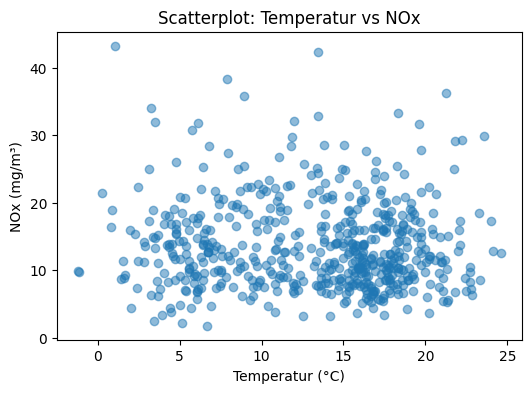

NameError: name 'wind_aligned' is not defined

<Figure size 600x400 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

# Temperatur vs NOx
plt.figure(figsize=(6,4))
plt.scatter(temp_aligned[mask], nox_aligned[mask], alpha=0.5)
plt.xlabel("Temperatur (°C)")
plt.ylabel("NOx (mg/m³)")
plt.title("Scatterplot: Temperatur vs NOx")
plt.show()

# Vindstyrke vs NOx
plt.figure(figsize=(6,4))
plt.scatter(wind_aligned[mask], nox_aligned[mask], alpha=0.5, color='orange')
plt.xlabel("Vindstyrke (m/s)")
plt.ylabel("NOx (mg/m³)")
plt.title("Scatterplot: Vindstyrke vs NOx")
plt.show()

Et scatter plot viser sammenhengen mellom to variabler. Hvis punktene danner et tydelig mønster (for eksempel en stigende eller synkende linje), tyder det på en sammenheng. Hvis punktene er spredt tilfeldig, er det liten eller ingen lineær sammenheng.

For temperatur vs NOx: Hvis punktene er spredt uten mønster, støtter det at R² er nær 0.
For vindstyrke vs NOx: Hvis punktene har en svak negativ trend, kan det tyde på at økt vind gir lavere NOx, men hvis de er spredt, er sammenhengen svak.
Scatter plots hjelper deg å se om det er en visuell sammenheng, selv om R² er lav.

Merk at her skrives det i markdown, og ikke kode